# Data Preprocessing 

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn import metrics
from sklearn.svm import SVR
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
# Read Covid Confirmed Cases data from CSV
confirm = pd.read_csv(r"C:\Users\USER\Desktop\Covid-19 Data set\time_series_covid19_confirmed_global.csv")

In [3]:
confirm.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,158381,158394,158471,158511,158602,158639,158678,158717,158826,158974
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,219694,220487,222664,224569,226598,228777,230940,232637,233654,236486
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,222157,222639,223196,223806,224383,224979,225484,226057,226749,227559
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,26408,27983,28542,28899,28899,29888,29888,29888,29888,29888
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,89718,90316,91148,91907,92581,93302,93524,93694,93974,94275


In [4]:
confirm.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '1/9/22', '1/10/22', '1/11/22', '1/12/22', '1/13/22', '1/14/22',
       '1/15/22', '1/16/22', '1/17/22', '1/18/22'],
      dtype='object', length=732)

In [5]:
# Reshaping Data Sets
dates = confirm.columns[4:]

In [6]:
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '1/9/22', '1/10/22', '1/11/22', '1/12/22', '1/13/22', '1/14/22',
       '1/15/22', '1/16/22', '1/17/22', '1/18/22'],
      dtype='object', length=728)

In [7]:
# unpivoted DataFrame from wide format to long format
confirm_df_long = confirm.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Confirmed'
)

In [8]:
confirm_df_long

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
203835,NaN,Vietnam,14.058324,108.277199,1/18/22,2062128
203836,NaN,West Bank and Gaza,31.952200,35.233200,1/18/22,477151
203837,NaN,Yemen,15.552727,48.516388,1/18/22,10408
203838,NaN,Zambia,-13.133897,27.849332,1/18/22,298032


In [9]:
# Convert String Date Time Into Python Date Time Object.
confirm_df_long['Date'] = pd.to_datetime(confirm_df_long['Date'])

In [10]:
confirm_df_long

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0
...,...,...,...,...,...,...
203835,NaN,Vietnam,14.058324,108.277199,2022-01-18,2062128
203836,NaN,West Bank and Gaza,31.952200,35.233200,2022-01-18,477151
203837,NaN,Yemen,15.552727,48.516388,2022-01-18,10408
203838,NaN,Zambia,-13.133897,27.849332,2022-01-18,298032


In [11]:
confirm_df_long.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
dtype: object

In [12]:
confirm_df_long.drop(["Province/State", "Lat","Long"], axis = 1, inplace = True)

In [13]:
confirm_df_long

,Country/Region,Date,Confirmed
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0
...,...,...,...
203835,Vietnam,2022-01-18,2062128
203836,West Bank and Gaza,2022-01-18,477151
203837,Yemen,2022-01-18,10408
203838,Zambia,2022-01-18,298032


In [14]:
# Accessed Bangladesh Confirmed_cases data by Label(s)
Bangladesh_confirmed_cases = confirm_df_long.set_index("Country/Region")
df_confirmed_cases = Bangladesh_confirmed_cases.loc['Bangladesh', 'Date':'Confirmed']

In [15]:
df_confirmed_cases

,Date,Confirmed
Country/Region,,
Bangladesh,2020-01-22,0
Bangladesh,2020-01-23,0
Bangladesh,2020-01-24,0
Bangladesh,2020-01-25,0
Bangladesh,2020-01-26,0
...,...,...
Bangladesh,2022-01-14,1609042
Bangladesh,2022-01-15,1612489
Bangladesh,2022-01-16,1617711


In [16]:
df_confirmed_cases = (df_confirmed_cases.assign(new_cases = df_confirmed_cases.Confirmed.diff()))

In [17]:
df_confirmed_cases

,Date,Confirmed,new_cases
Country/Region,,,
Bangladesh,2020-01-22,0,NaN
Bangladesh,2020-01-23,0,0.0
Bangladesh,2020-01-24,0,0.0
Bangladesh,2020-01-25,0,0.0
Bangladesh,2020-01-26,0,0.0
...,...,...,...
Bangladesh,2022-01-14,1609042,4378.0
Bangladesh,2022-01-15,1612489,3447.0
Bangladesh,2022-01-16,1617711,5222.0


In [18]:
df_confirmed_cases.isna().sum()

Date         0
Confirmed    0
new_cases    1
dtype: int64

In [19]:
# filling na with 0
df_confirmed_cases = df_confirmed_cases.fillna(0)

In [20]:
df_confirmed_cases

,Date,Confirmed,new_cases
Country/Region,,,
Bangladesh,2020-01-22,0,0.0
Bangladesh,2020-01-23,0,0.0
Bangladesh,2020-01-24,0,0.0
Bangladesh,2020-01-25,0,0.0
Bangladesh,2020-01-26,0,0.0
...,...,...,...
Bangladesh,2022-01-14,1609042,4378.0
Bangladesh,2022-01-15,1612489,3447.0
Bangladesh,2022-01-16,1617711,5222.0


In [21]:
first_75_days_forcasting_dataset = df_confirmed_cases.loc[(df_confirmed_cases['Date'] >= '2021-05-08')
                     & (df_confirmed_cases['Date'] < '2021-07-22')]

In [22]:
first_75_days_forcasting_dataset['Day'] = np.arange(len(first_75_days_forcasting_dataset.index))
first_75_days_dataset = first_75_days_forcasting_dataset.set_index("Date")

In [23]:
first_75_days_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 75 entries, 2021-05-08 to 2021-07-21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Confirmed  75 non-null     int64  
 1   new_cases  75 non-null     float64
 2   Day        75 non-null     int32  
dtypes: float64(1), int32(1), int64(1)
memory usage: 2.1 KB


# Short term Future Forcasting Using ML

In [24]:
first_75_days_dataset.head()

,Confirmed,new_cases,Day
Date,,,
2021-05-08,772127,1285.0,0
2021-05-09,773513,1386.0,1
2021-05-10,775027,1514.0,2
2021-05-11,776257,1230.0,3
2021-05-12,777397,1140.0,4


In [25]:
X= first_75_days_dataset['Day']
y= first_75_days_dataset['new_cases']
x_prediction = [[76],[77],[78],[79],[80],[81],[82]]

In [26]:
X

Date
2021-05-08     0
2021-05-09     1
2021-05-10     2
2021-05-11     3
2021-05-12     4
              ..
2021-07-17    70
2021-07-18    71
2021-07-19    72
2021-07-20    73
2021-07-21    74
Name: Day, Length: 75, dtype: int32

In [27]:
y

Date
2021-05-08     1285.0
2021-05-09     1386.0
2021-05-10     1514.0
2021-05-11     1230.0
2021-05-12     1140.0
               ...   
2021-07-17     8489.0
2021-07-18    11578.0
2021-07-19    13321.0
2021-07-20    11579.0
2021-07-21     7614.0
Name: new_cases, Length: 75, dtype: float64

Mean Absolute Error: 593.4042758317512
Mean Squared Error: 643586.3761055729
Root Mean Squared Error: 802.2383536740019
R2 Score: 0.9607702326560494
R2 Score in percent: 96.07702326560495 %


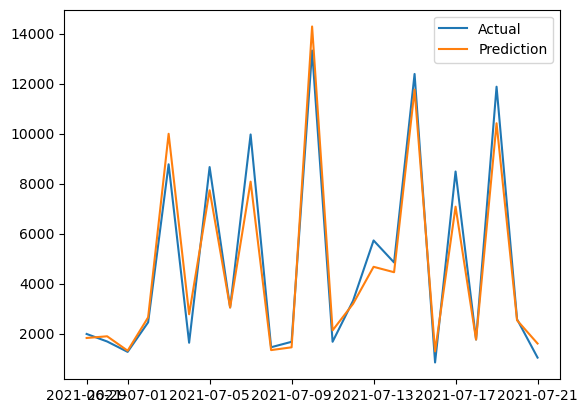

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

reg = SVR(kernel="poly", C=0.3, gamma=0.3, degree=3)

reg.fit(np.array(X_train).reshape(-1,1),y_train.ravel())
y_pred = reg.predict(np.array(X_test).reshape(-1,1))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

plt.plot(first_75_days_dataset.index[-len(y_pred):], y_test, label='Actual')
plt.plot(first_75_days_dataset.index[-len(y_pred):], y_pred, label='Prediction')

r2_score = reg.score(np.array(X_test).reshape(-1,1),y_test)

print('R2 Score:',r2_score)
print('R2 Score in percent:',r2_score*100,'%')

plt.legend(loc=1)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

In [29]:
X = np.array(X_train).reshape(-1,1)
y = np.array(y_train).reshape(-1,1)
cv_score = cross_val_score(reg, X,y.ravel(),cv=10)

In [30]:
cv_score

array([ 0.82939022,  0.78099838,  0.92160574,  0.84747073,  0.75548502,
       -0.22746416,  0.97064869,  0.9063319 ,  0.57226441,  0.89600917])

In [31]:
print('Evaluation for expecting 7 days in future in Support Vector Regression:')
for predict in x_prediction:
    print('day',predict,'=',int(reg.predict([predict])))

Evaluation for expecting 7 days in future in Support Vector Regression:
day [76] = 16570
day [77] = 17182
day [78] = 17809
day [79] = 18453
day [80] = 19113
day [81] = 19790
day [82] = 20484


In [32]:
pred_dataset = df_confirmed_cases.loc[(df_confirmed_cases['Date'] >= '2021-5-08')
                     & (df_confirmed_cases['Date'] < '2021-07-29')]

In [33]:
pred_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82 entries, Bangladesh to Bangladesh
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       82 non-null     datetime64[ns]
 1   Confirmed  82 non-null     int64         
 2   new_cases  82 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.6+ KB


In [34]:
pred_dataset['Day'] = np.arange(len(pred_dataset.index))
pred_dataset = pred_dataset.set_index("Date")
pred_dataset.drop(["Confirmed"], axis = 1, inplace = True)

In [35]:
pred = pred_dataset ['Day']
ac = pred_dataset['new_cases']
yp = reg.predict(np.array(pred).reshape(-1,1))

In [36]:
ac

Date
2021-05-08     1285.0
2021-05-09     1386.0
2021-05-10     1514.0
2021-05-11     1230.0
2021-05-12     1140.0
               ...   
2021-07-24     6780.0
2021-07-25    11291.0
2021-07-26    15192.0
2021-07-27    14925.0
2021-07-28    16230.0
Name: new_cases, Length: 82, dtype: float64

In [37]:
ac_X= first_75_days_dataset['Day']
ac_y= first_75_days_dataset['new_cases']

In [38]:
ac_X.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 75 entries, 2021-05-08 to 2021-07-21
Series name: Day
Non-Null Count  Dtype
--------------  -----
75 non-null     int32
dtypes: int32(1)
memory usage: 900.0 bytes


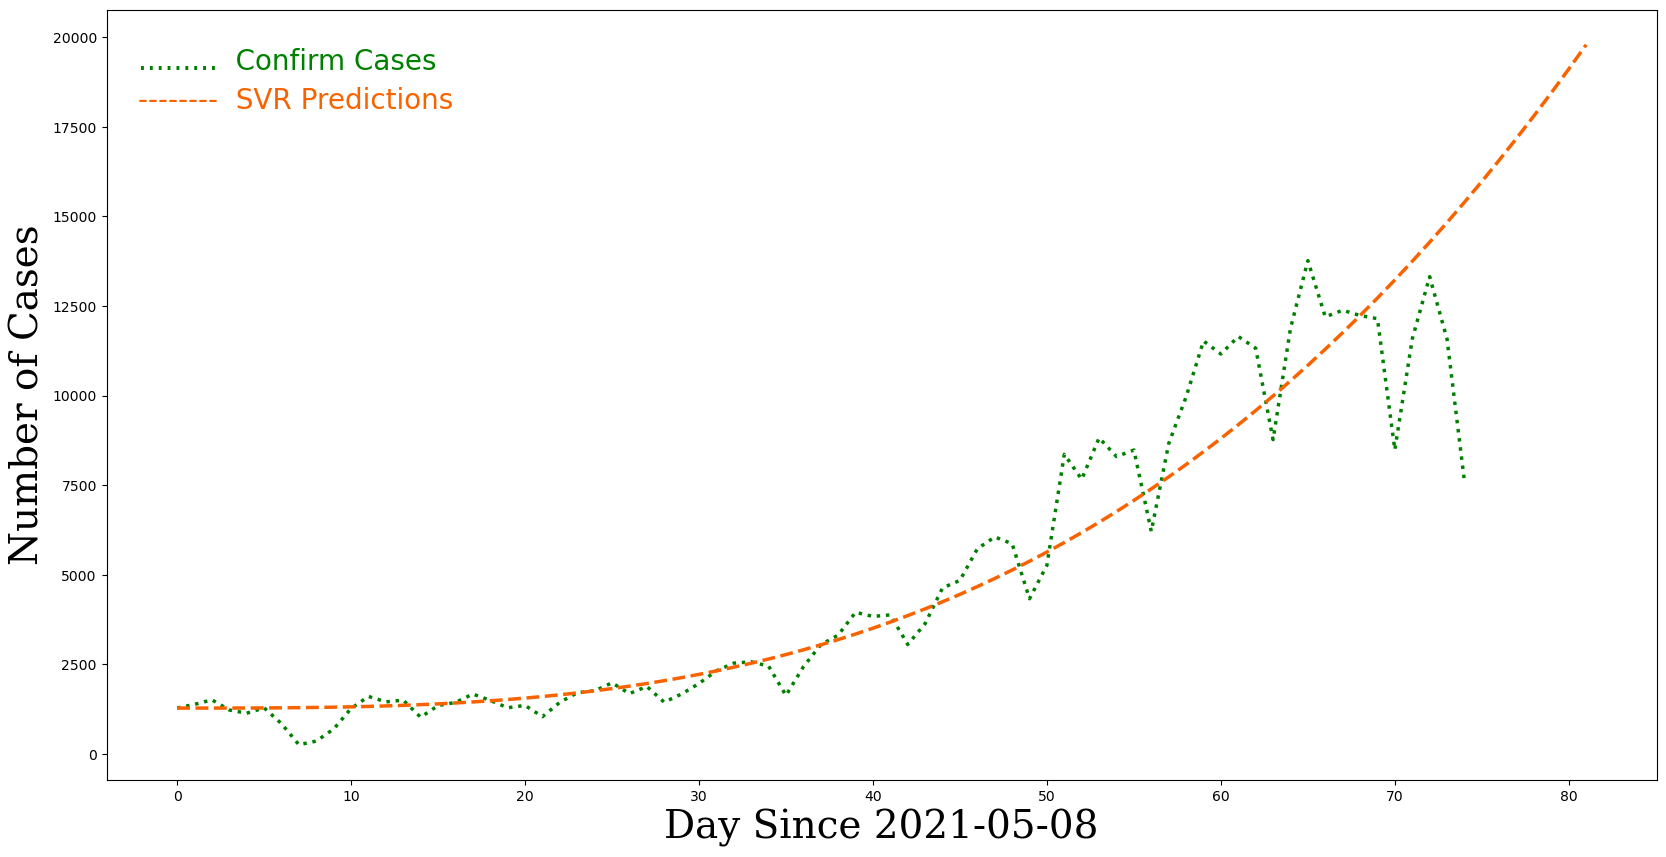

In [39]:
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(ac_X,ac_y,color='g', linestyle = 'dotted', linewidth = '2.5')
plt.plot(pred, yp, color='#f86300', linestyle = 'dashed', linewidth = '2.5')
font1 = {'family':'serif','color':'black','size':28}
plt.xlabel("Day Since 2021-05-08", fontdict = font1)
plt.ylabel("Number of Cases", fontdict = font1)
ax.text(0.02, 0.95, '.........  Confirm Cases',
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes,
        color='green', fontsize=20)
ax.text(0.02, 0.90, '--------  SVR Predictions',
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes,
        color='#f86300', fontsize=20)
plt.show() 